<a href="https://colab.research.google.com/github/RedJohn-2/domino/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

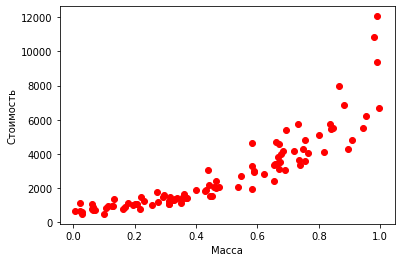

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
# Масса бриллианта (один вектор признак - колонка)
x = np.array([0.6831959 , 0.25458259, 0.67354428, 0.74830613, 0.90739678,
       0.06290735, 0.16839531, 0.07119818, 0.29584922, 0.84051769,
       0.99741599, 0.71778914, 0.84714404, 0.39867692, 0.00473723,
       0.19515797, 0.58313993, 0.54521131, 0.02891357, 0.62185654,
       0.06057894, 0.4634715 , 0.02124199, 0.21881736, 0.69091361,
       0.44595423, 0.44023751, 0.33686769, 0.6587982 , 0.29263264,
       0.31404403, 0.81788651, 0.31189899, 0.83582828, 0.36755224,
       0.21713878, 0.99075022, 0.22865144, 0.59006634, 0.3274291 ,
       0.06192493, 0.44105918, 0.98927508, 0.12416194, 0.76481954,
       0.06342749, 0.88284818, 0.79940882, 0.89634089, 0.27545022,
       0.66782815, 0.31282714, 0.94528755, 0.3505917 , 0.13078033,
       0.42865987, 0.10672609, 0.32257667, 0.11124472, 0.67095367,
       0.20620607, 0.31236211, 0.75648501, 0.58250717, 0.73358102,
       0.73830706, 0.43125426, 0.58802052, 0.97980417, 0.4660172 ,
       0.6554308 , 0.95263401, 0.45736879, 0.53784394, 0.35256428,
       0.66130454, 0.09988696, 0.33070248, 0.36193415, 0.67583453,
       0.36970363, 0.69452546, 0.02939772, 0.66806118, 0.75622945,
       0.12861229, 0.27140559, 0.47572908, 0.20046112, 0.02247425,
       0.16143744, 0.65309753, 0.35869316, 0.45083235, 0.67005189,
       0.17758147, 0.58231079, 0.73645021, 0.86441219])

# Стоимость бриллиантов (целевой вектор признак - колонка)
y = np.array([ 4202.27140758,  1048.00429624,  3559.61471675,  4268.78115297,
        4827.21522722,   880.96135823,   906.80757612,   701.05224513,
        1579.55668945,  5443.75092094,  6666.49770578,  4151.76084197,
        5526.62468583,  1925.20262991,   651.94842491,  1006.14855486,
        3292.32797743,  2715.58263709,   617.46595473,  2819.93960765,
        1053.30969989,  2037.40740842,   682.2738903 ,  1503.2987091 ,
        3052.70388609,  1530.6617565 ,  3045.19156367,  1452.06569191,
        3444.299013  ,  1477.03599097,  1470.8705949 ,  4124.78906891,
        1107.72959289,  5728.11209103,  1456.33429815,   807.52129543,
        9376.71903183,  1283.44753382,  2960.54976957,  1307.95523321,
         815.14992123,  2198.30018159, 12048.11979255,   978.39652106,
        4051.11260865,   748.34989044,  6836.57033278,  5103.48962728,
        4276.62933577,  1178.77483245,  3491.20866576,  1270.52722773,
        5527.14071774,  1136.24378178,  1395.9901034 ,  1812.98153522,
         858.48927373,  1294.02903657,   937.79706412,  3100.59803684,
        1092.26384023,  1087.2067898 ,  3590.52622572,  1968.6438898 ,
        5768.30663329,  3382.62983174,  1905.49705482,  2991.27314895,
       10864.12903023,  2424.09034666,  2441.55525994,  6211.76128177,
        2090.69383603,  2050.07873383,  1355.56587375,  4712.83089618,
         508.61315703,  1357.93084028,  1693.34412468,  4004.02646131,
        1418.49737981,  5399.47599715,   501.10585941,  3830.36534842,
        4797.31976234,   944.69922133,  1767.368758  ,  2094.57915139,
        1082.17027822,  1110.09170937,   797.06686217,  3364.74611171,
        1464.25709568,  1550.53558302,  4595.81721383,  1146.14511085,
        4656.01714901,  3638.1124629 ,  7948.5540399])

plt.plot(x, y, 'ro') # отображаем наши данные
plt.xlabel('Масса') # название оси X
plt.ylabel('Стоимость') # название оси Y
plt.show()

In [3]:
# сгенерируем начальные значения параметров из нормального распределения
w = np.random.randn(1) # вес (weight)
b = np.random.randn(1) # сдвиг (bias)
# скорость обучения
lr = 10 ** (-8)
# количество эпох (количество итераций обновления наших параметров)
n_epochs = 20000

# будем сохранять каждую итерацию ошибки
mse_list = []

# основной цикл обучения модели
for epoch in range(n_epochs):

    # делаем предсказание с текущими коэффициентами b и w и данными x
    y_pred = math.e ** (b + w * x)

    # посчитаем функцию ошибки MSE
    mse = np.mean(((y - y_pred)**2))

    # сохраним ошибку
    mse_list.append(mse)
    
    # считаем градиенты при текущих параметрах (смотреть формулы полученных производных выше)
    b_grad = -2 * ((y - y_pred) * y_pred).mean() # для коэффициента b
    w_grad = -2 * ((y - y_pred)*x*y_pred).mean() # для коэффициента w
    
    # обновляем параметры, используя коэффициент скорости обучения
    b = b - lr * b_grad
    w = w - lr * w_grad

    if epoch % 500==0:
      print('MSE: эпоха ', epoch, ': ', mse) # выведем ошибку каждую 20-ую итерацию обучения

MSE: эпоха  0 :  12849521.357304674
MSE: эпоха  500 :  12849417.563022805
MSE: эпоха  1000 :  12849307.910861433
MSE: эпоха  1500 :  12849191.887915703
MSE: эпоха  2000 :  12849068.919444473
MSE: эпоха  2500 :  12848938.359247077
MSE: эпоха  3000 :  12848799.47818332
MSE: эпоха  3500 :  12848651.450404482
MSE: эпоха  4000 :  12848493.336744199
MSE: эпоха  4500 :  12848324.064560775
MSE: эпоха  5000 :  12848142.403113237
MSE: эпоха  5500 :  12847946.933271216
MSE: эпоха  6000 :  12847736.009975858
MSE: эпоха  6500 :  12847507.715341954
MSE: эпоха  7000 :  12847259.799559075
MSE: эпоха  7500 :  12846989.60571755
MSE: эпоха  8000 :  12846693.973211618
MSE: эпоха  8500 :  12846369.112236079
MSE: эпоха  9000 :  12846010.438746411
MSE: эпоха  9500 :  12845612.354533868
MSE: эпоха  10000 :  12845167.94985343
MSE: эпоха  10500 :  12844668.59477406
MSE: эпоха  11000 :  12844103.367396003
MSE: эпоха  11500 :  12843458.237474712
MSE: эпоха  12000 :  12842714.873898413
MSE: эпоха  12500 :  1284184

In [4]:
print('Найденный параметр b: ', b)
print('Найденный параметр w: ', w)

Найденный параметр b:  [6.4064233]
Найденный параметр w:  [2.66158669]


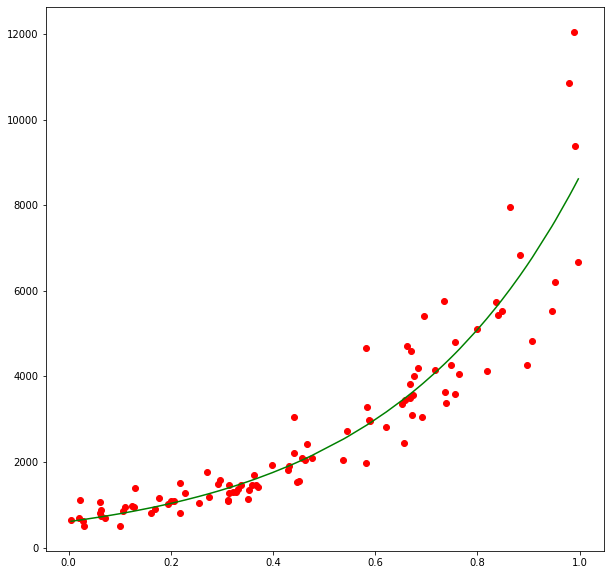

In [6]:
y_pred = math.e ** (b+w*x) # после нахождения параметров построим нашу линейную регрессию
x_sorted, y_pred_sorted = zip(*sorted(zip(x,y_pred),key=lambda x: x[0]))

plt.figure(figsize=(10, 10))
plt.plot(x, y, 'ro') # выведем наши данные
plt.plot(x_sorted, y_pred_sorted, 'g') # построим линейную регрессию
plt.show()

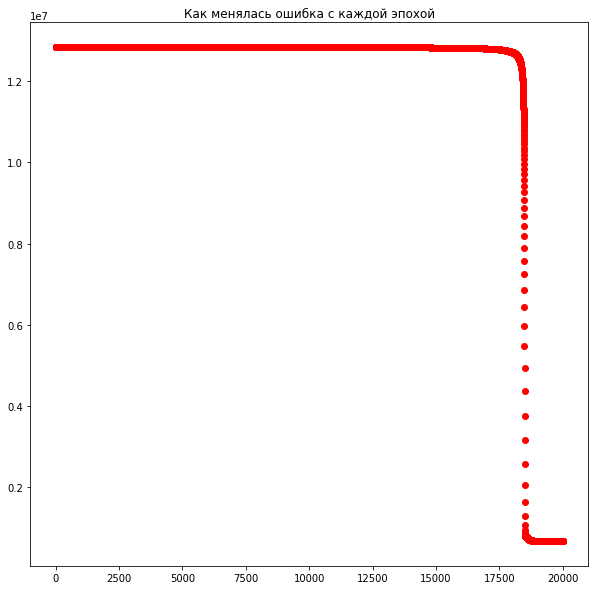

In [7]:
plt.figure(figsize=(10, 10))
plt.plot(range(n_epochs), mse_list, 'ro') # ось x - количество эпох(range(n_epochs)), ось y - наши ошибки(mse_list)
plt.title('Как менялась ошибка с каждой эпохой')
plt.show()

In [8]:
y_n = math.e ** (b + w * 0.60237692)
print(y_n)

[3010.01907825]
